# Clustering Techniques - Kmeans
### Aim: To cluster the species based on their age.
### Dataset: Abalone
### Source: Kaggle: https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("abalone - abalone.csv")
data.head(5)

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
data.isnull().sum()

LongestShell     0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LongestShell   4177 non-null   float64
 1   Diameter       4177 non-null   float64
 2   Height         4177 non-null   float64
 3   WholeWeight    4177 non-null   float64
 4   ShuckedWeight  4177 non-null   float64
 5   VisceraWeight  4177 non-null   float64
 6   ShellWeight    4177 non-null   float64
 7   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


The dataset consists of 4177 records and 8 columns of which all are of numeric type. There are no missing values and duplicate values in the dataset

Inspection of Outliers

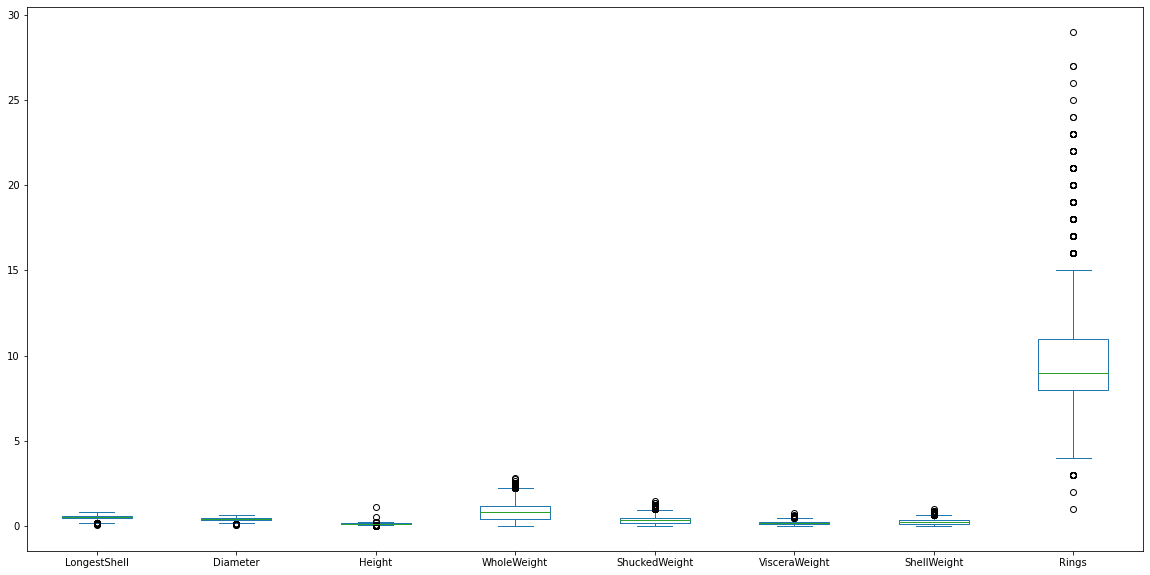

In [ ]:
data[["LongestShell","Diameter","Height", "WholeWeight","ShuckedWeight","VisceraWeight","ShellWeight","Rings"]].plot(kind="box", figsize=(20,10))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


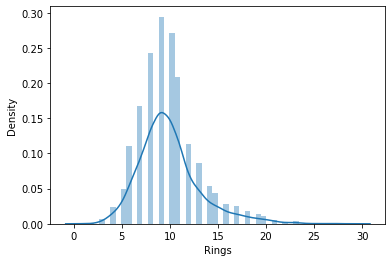

In [ ]:
sns.distplot(data["Rings"])

In [ ]:

from scipy.stats import skew
print("Skewness of Rings: ",skew(data["Rings"]))

Skewness of Rings:  1.1137017739656028


In [ ]:
P25 = data["Rings"].quantile(0.25)
P75 = data["Rings"].quantile(0.75)
print(P25,P75)

8.0 11.0


In [ ]:
upper = P75 + 1.5*(P75-P25)
lower = P25 - 1.5*(P75-P25)
print(upper,lower)

15.5 3.5


In [ ]:
data[data["Rings"]>upper]

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19
32,0.665,0.525,0.165,1.3380,0.5515,0.3575,0.350,18
33,0.680,0.550,0.175,1.7980,0.8150,0.3925,0.455,19
...,...,...,...,...,...,...,...,...
3929,0.650,0.515,0.215,1.4980,0.5640,0.3230,0.425,16
3930,0.670,0.535,0.185,1.5970,0.6275,0.3500,0.470,21
3931,0.550,0.440,0.165,0.8605,0.3120,0.1690,0.300,17
3944,0.550,0.440,0.160,0.9910,0.3480,0.1680,0.375,20


In [ ]:
data[data["Rings"]<lower]

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
236,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
237,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
238,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
306,0.165,0.120,0.030,0.0215,0.0070,0.0050,0.0050,3
520,0.210,0.150,0.050,0.0385,0.0155,0.0085,0.0100,3
526,0.155,0.110,0.040,0.0155,0.0065,0.0030,0.0050,3
719,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
720,0.160,0.110,0.025,0.0180,0.0065,0.0055,0.0050,3
894,0.240,0.175,0.065,0.0665,0.0310,0.0135,0.0170,3
1054,0.195,0.150,0.045,0.0375,0.0180,0.0060,0.0110,3


In [ ]:
new_data = data.copy()
new_data["Rings"]=np.where(new_data["Rings"]>upper,upper,
                               np.where(new_data["Rings"]<lower,lower,
                                        new_data["Rings"]))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

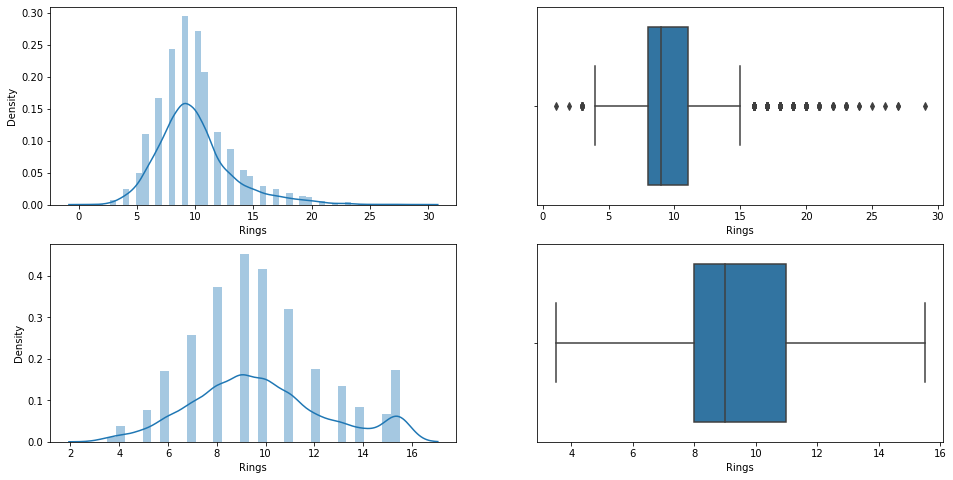

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data["Rings"])
plt.subplot(2,2,2)
sns.boxplot(data["Rings"])
plt.subplot(2,2,3)
sns.distplot(new_data["Rings"])
plt.subplot(2,2,4)
sns.boxplot(new_data["Rings"])
plt.show()

Elbow method to find the optimal Value

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


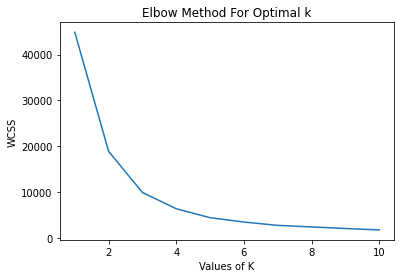

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmean = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmean.fit(data)
    wcss.append(kmean.inertia_)

sns.lineplot(range(1,11), wcss)
plt.xlabel("Values of K")
plt.ylabel("WCSS")
plt.title("Elbow Method For Optimal k")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(data)
y_kmeans[1:25]

array([0, 1, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1], dtype=int32)

[0 1 2]


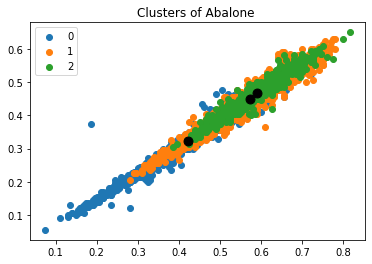

In [ ]:
u_labels = np.unique(y_kmeans)
print(u_labels)
X =np.array(data)
centroids = kmeans.cluster_centers_
for i in u_labels:
    plt.scatter(X[y_kmeans == i , 0] , X[y_kmeans == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.title("Clusters of Abalone ")
plt.legend()
plt.show()





In the Elbow method we calculate the sum of the squared distances between each point and the centroid of the cluster. When we plot the within cluster sum of squared with the K values we get a curve in the shape of the elbow. Thus, in the plot where the sum of the squared distances falls suddenly will be chosen as our optimal K value. In the plot we obtained, the sudden change can be seen near the point k=3, thus the optimal number of clusters for our data using Elbow curve method is 3.

Optimal K Value using Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = []
for i in range(2,11):
 km = KMeans(n_clusters=i, init = 'k-means++', random_state =42)
 km.fit_predict(data)
 silhouette_avg.append(silhouette_score(data, km.labels_))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


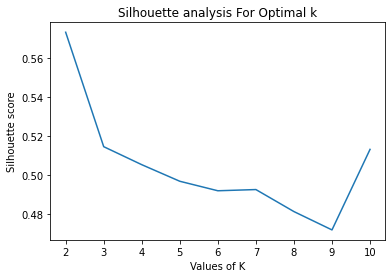

In [ ]:
sns.lineplot(range(2,11),silhouette_avg)
plt.xlabel("Values of K")
plt.ylabel("Silhouette score")
plt.title("Silhouette analysis For Optimal k")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(data)
y_kmeans[1:25]

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int32)

[0 1]


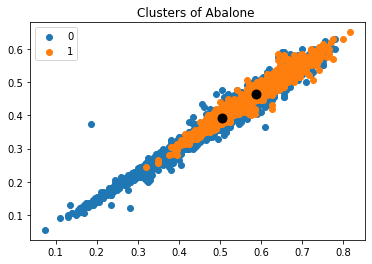

In [ ]:
u_labels = np.unique(y_kmeans)
print(u_labels)
X =np.array(data)
centroids = kmeans.cluster_centers_
for i in u_labels:
    plt.scatter(X[y_kmeans == i , 0] , X[y_kmeans == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.title("Clusters of Abalone ")
plt.legend()
plt.show()



In Silhouette we measure similarity of a data point within within the cluster compared to the other clusters. We calculate the average silhoutte for every value of K and plot the graph of average silhoutte and K values. We select the value of K where the silhoutte score is maximized. In our obtained curve, the score is maximized at K=2, hence 2 is the optimal number of clusters obtained using Silhouette method.


# Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
near = linkage(data, method="single")
far =linkage(data, method="complete")
upgma = linkage(data, method="average")

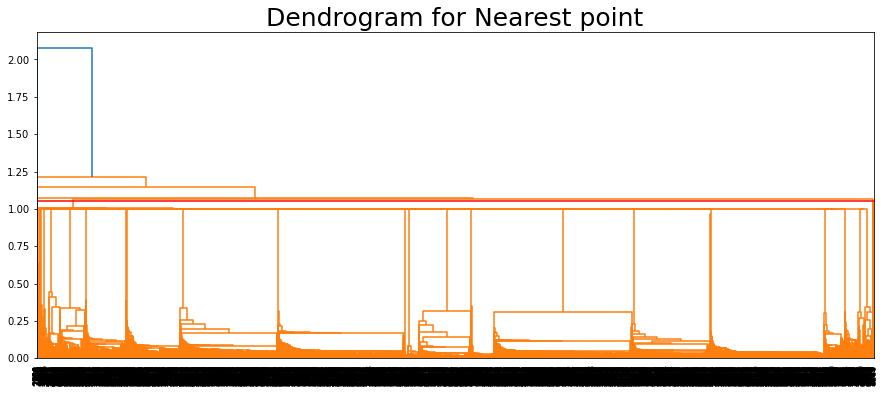

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Dendrogram for Nearest point",fontsize=25)
dendrogram(near,leaf_rotation=90,leaf_font_size=8)
plt.axhline(y = 1.26, color = 'r', linestyle = '-')
plt.show()

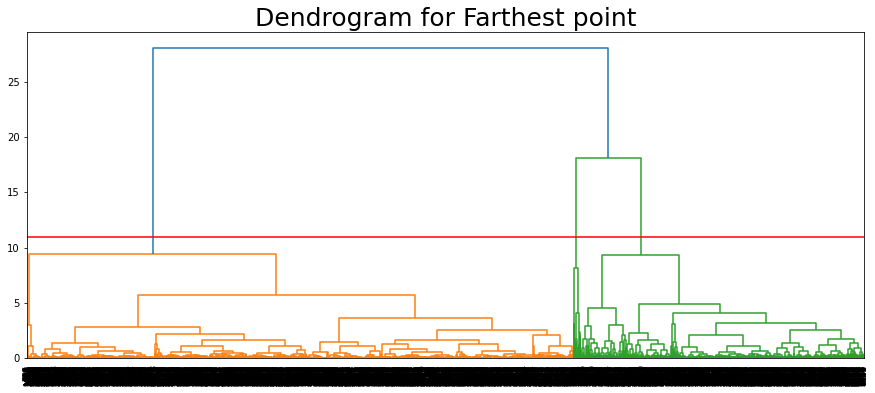

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Dendrogram for Farthest point",fontsize=25)
dendrogram(far,leaf_rotation=90,leaf_font_size=8)
plt.axhline(y = 11, color = 'r', linestyle = '-')
plt.show()

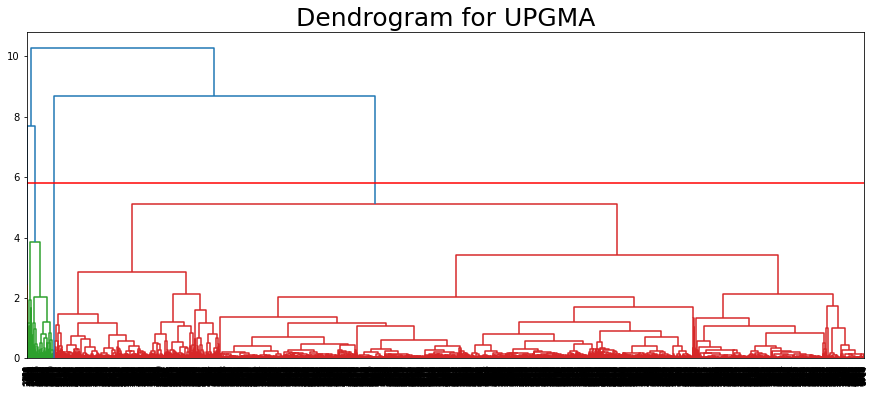

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Dendrogram for UPGMA",fontsize=25)
dendrogram(upgma,leaf_rotation=90,leaf_font_size=8)
plt.axhline(y = 5.8, color = 'r', linestyle = '-')
plt.show()

The dendograms for single, complete and average linkages are plot. We can select the  No.of clusters from dendrogram that is We select the largest vertical line which can not cut by horizontal line. In complete and Average Linkage, the optimal number of clusters that can be formed in both linkages are 3

Finding the Optimal Number of clusters using GridSearchCV

In [ ]:
para={'affinity':['euclidean','l1','l2','manhattan'],
      'linkage':['complete','average','single']}
grd=GridSearchCV(AgglomerativeClustering(),para,scoring='accuracy')

grd.fit(data)
grd.best_params_

{'affinity': 'euclidean', 'linkage': 'complete'}

The optimal parameters obtained is for Complete Linkage using Euclidean Distance Measure.

Hierarchical Clustering with Complete Linkage and Euclidean Distance

In [ ]:
HC1=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity='euclidean')
HC1.fit_predict(data)

array([1, 0, 0, ..., 0, 0, 1])

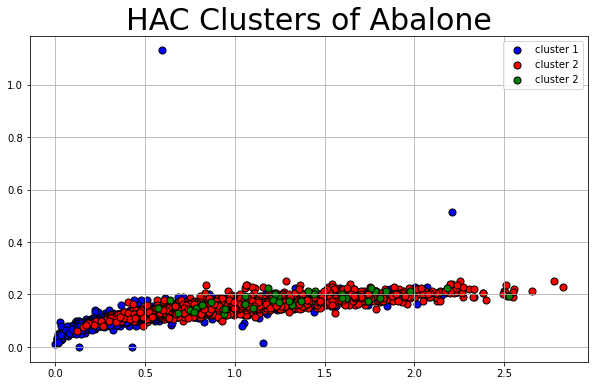

In [ ]:
X=np.array(data)
y=HC1.fit_predict(data)

# plot the 4 clusters
plt.figure(figsize=(10,6))
plt.scatter(
    X[y == 0, 3], X[y == 0, 2],
    c='blue',s=50,
    marker='o', edgecolor='black',
    label='cluster 1'
)


plt.scatter(
    X[y == 1, 3], X[y == 1, 2],
    c='red',s=50,
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y == 2, 3], X[y == 2, 2],
    c='green',s=50,
    marker='o', edgecolor='black',
    label='cluster 2'
)



plt.title("HAC Clusters of Abalone",fontsize=30)
plt.legend(scatterpoints=1)

plt.grid()
plt.show()

By using GridSearchCV, the optimal number parameters obtained is Complete linkage and the number of optimal clusters obtained through Dendograms is 3, hence we have fit the HAC model by using these parameters

# Gaussian Mixture Model

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3)
gmm.fit(data)

GaussianMixture(n_components=3)

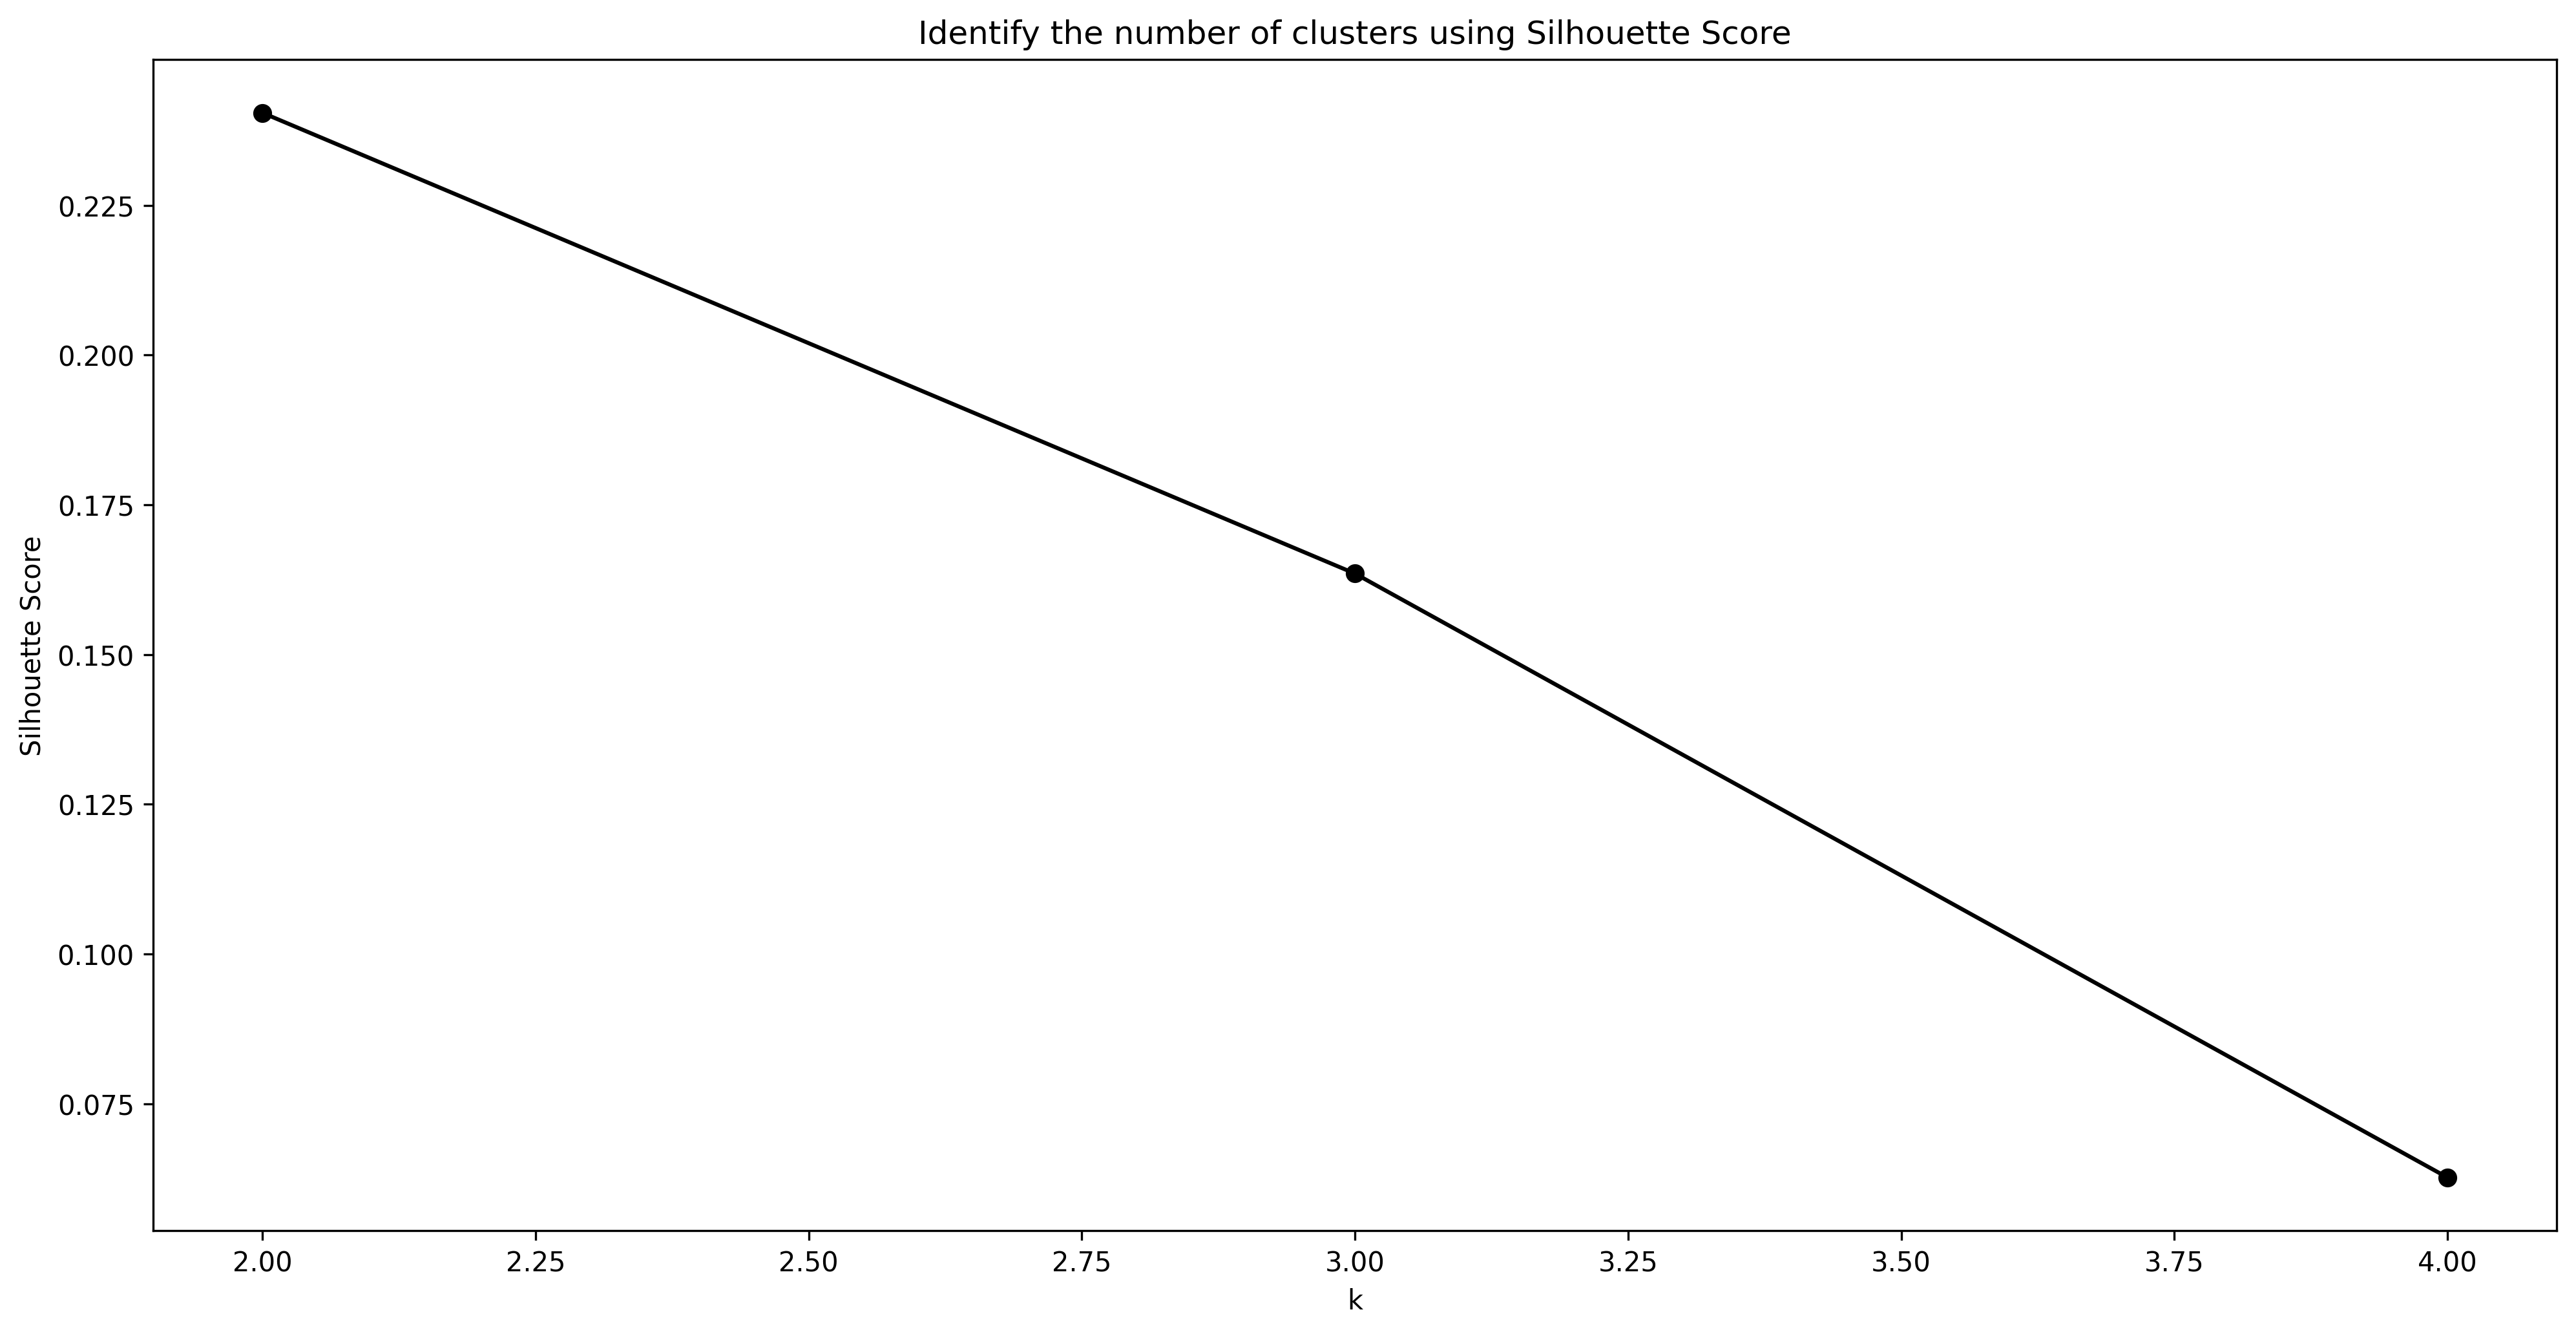

In [ ]:
from sklearn.metrics import silhouette_score
S=[]

# Range of clusters to try (2 to 10)
K=range(2,5)



for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model
    labels = model.fit_predict(data)
    # Calculate Silhoutte Score and append to a list
    S.append(silhouette_score(data, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

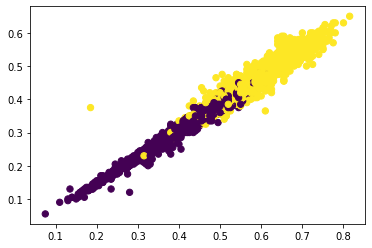

In [ ]:
gmm1 = GaussianMixture(n_components = 2)
gmm1.fit(data)
labels = gmm1.predict(data)
labels[1:25]
X=np.array(data)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap = "viridis")

Initially we selected a random number of clusters as 3. Later we used the Silhouette score and found that the optimal number of clusters is 2. And thus, we build an Guassian Mixture Model with 2 components,